<a href="https://colab.research.google.com/github/VermaSanjayrk/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

Importing Libraries

In [1]:
#loading the Required libraries-
import numpy as np                   # linear algebra & Extensively used to load and wrangle with the dataset.
import pandas as pd                  # data processing & For some math operations in predictions
import matplotlib.pyplot as plt      # Used for visualization.
import seaborn as sns                # Used for visualization.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as mno             # install  pip install missingno
import warnings                     # For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from scipy import stats             # used for statistical analysis
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset of csv file-
nf=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [4]:
#To view the dataset 
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#Shape of the dataset
nf.shape

(7787, 12)

In [7]:
#To get the columns of the dataset
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# number of unique values that each column contains
nf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
#showing the datatype of all features
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
#Summary of the dataset
nf.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# **DATA PREPROCESSING-**

# ***Data Cleaning***

In [11]:
#Checking of Missing value
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

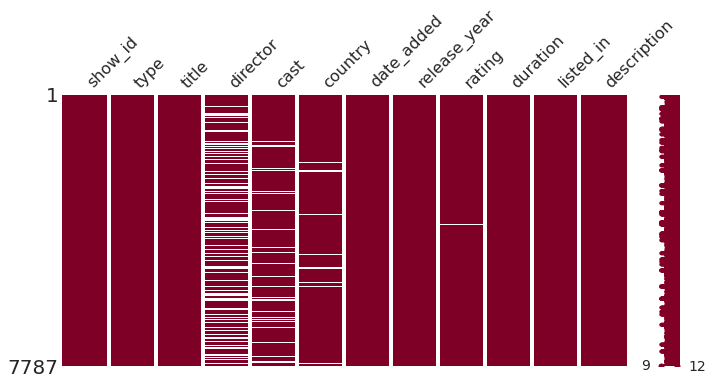

In [12]:
mno.matrix(nf,figsize=(10,5),color=(0.5,0.0,0.15))


### ***Comment:- There are missing values present in the features such as director,cast,country & date_added.***

In [13]:
#Dropping null values -
nf.dropna( how='any',subset=['cast', 'director'])
nf.drop_duplicates(inplace=True)

In [14]:
# To remove the missing values-
nf.dropna(axis=0,inplace=True)
nf.shape

(4808, 12)

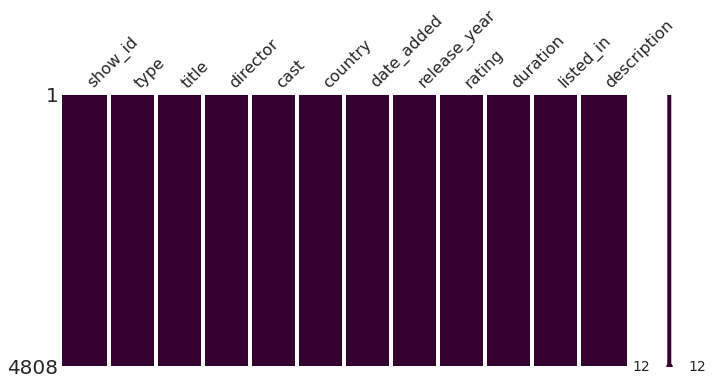

In [15]:
#Visualization after removing NAN values from the dataset-
mno.matrix(nf,figsize=(10,5),color=(0.2,0.0,0.19))

## **Converting into a proper date-time format and adding two more features year and month.**

In [16]:
nf["date_added"] = pd.to_datetime(nf['date_added'])
nf['day_added'] = nf['date_added'].dt.day
nf['year_added'] = nf['date_added'].dt.year
nf['month_added']=nf['date_added'].dt.month
nf['year_added'].astype(int);
nf['day_added'].astype(int);
nf['date_added'].astype(int);


In [17]:
#Finding seasons from durations
nf['season_count'] = nf.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
nf['duration'] = nf.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [18]:
#Renaming the ‘listed_in’ feature to the genre for easy use.
nf = nf.rename(columns={"listed_in":"genere"})
nf['genere'] = nf['genere'].apply(lambda x: x.split(",")[0])



In [19]:
# Cleaned dataset -
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genere,description,day_added,year_added,month_added,season_count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,2016,12,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,2018,12,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,2017,11,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,1,
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,,International TV Shows,A genetics professor experiments with a treatm...,1,2017,7,1


In [20]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4808 non-null   object        
 1   type          4808 non-null   object        
 2   title         4808 non-null   object        
 3   director      4808 non-null   object        
 4   cast          4808 non-null   object        
 5   country       4808 non-null   object        
 6   date_added    4808 non-null   datetime64[ns]
 7   release_year  4808 non-null   int64         
 8   rating        4808 non-null   object        
 9   duration      4808 non-null   object        
 10  genere        4808 non-null   object        
 11  description   4808 non-null   object        
 12  day_added     4808 non-null   int64         
 13  year_added    4808 non-null   int64         
 14  month_added   4808 non-null   int64         
 15  season_count  4808 non-null   object  

In [21]:
#After data cleaning the dataset look like this

#Let’s see the disribution of data

nf.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,genere,description,season_count
count,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808
unique,4808,2,4808,3613,4688,544,14,187,32,4803,10
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,TV-MA,,Dramas,A scheming matriarch plots to cut off her disa...,
freq,1,4673,1,18,10,1653,1665,135,1342,2,4673


# ***EXPLORATORY DATA ANALYSIS-***

**Type: Movie and TV Shows**

Text(0.5, 1.0, 'Type')

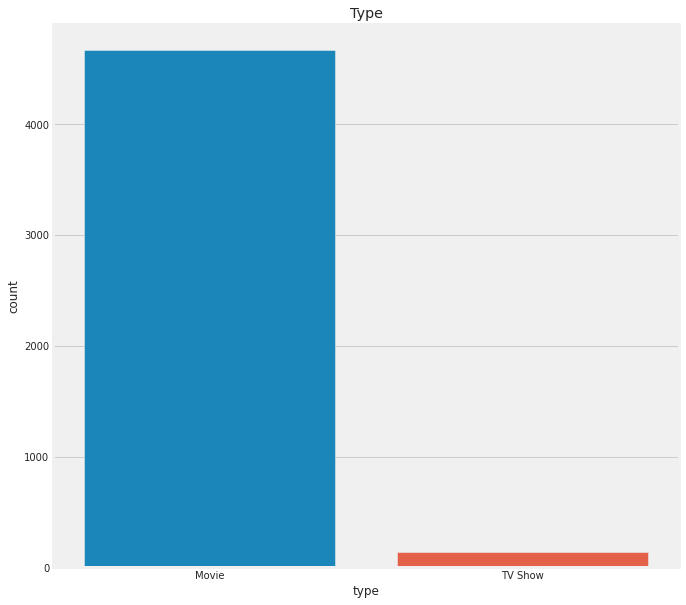

In [22]:
sns.countplot(nf['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

**Rating of shows and movies**

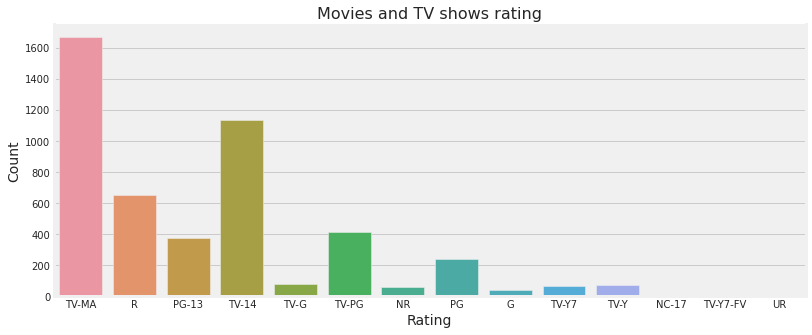

In [23]:
#plotting the value counts of Restaurant ratings
plt.figure(figsize=(12, 5))
sns.countplot(nf.rating)
plt.title('Movies and TV shows rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count', size=14)
plt.show()

### **Relation between Type and Rating**

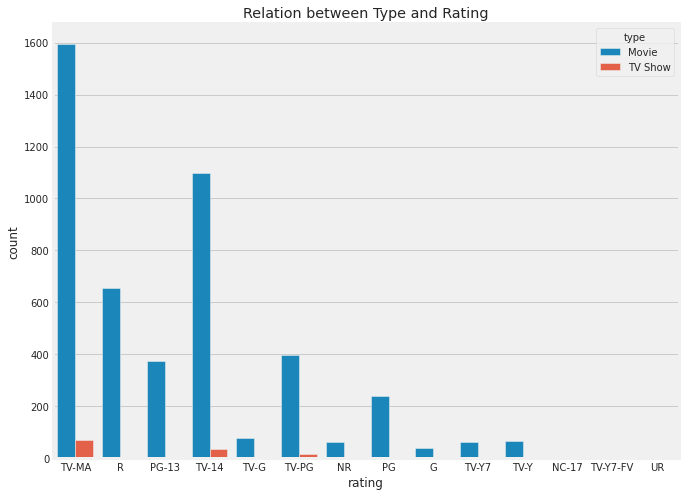

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=nf)
plt.title('Relation between Type and Rating')
plt.show()